In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('Titanic-Dataset.csv')
print("Data loaded!")
print(f"Total rows: {df.shape[0]}")
print(df.head())

Data loaded!
Total rows: 891
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [3]:
# See what columns we have
print(df.columns)
print("\nMissing values:")
print(df.isnull().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Cleaning data- remove useless columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [5]:
# Fill missing age with average age
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

In [6]:
# Fill missing embarked 
df['Embarked'].fillna('S', inplace=True)  

In [7]:
# Fill fare if missing
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [8]:
print("Data cleaned!")
print(df.isnull().sum())

Data cleaned!
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [9]:
# Adding new columns - family size and alone or not
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

In [10]:
print("New columns added!")
print(df.head())

New columns added!
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


In [11]:
# Change Sex to numbers
df['Sex_male'] = 0
df.loc[df['Sex'] == 'male', 'Sex_male'] = 1
df.drop('Sex', axis=1, inplace=True)

In [12]:
# Change Embarked to numbers
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [13]:
print("Categories changed to numbers!")
print(df.head())

Categories changed to numbers!
   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3  22.0      1      0   7.2500           2        0   
1         1       1  38.0      1      0  71.2833           2        0   
2         1       3  26.0      0      0   7.9250           1        1   
3         1       1  35.0      1      0  53.1000           2        0   
4         0       3  35.0      0      0   8.0500           1        1   

   Sex_male  Embarked_Q  Embarked_S  
0         1       False        True  
1         0       False       False  
2         0       False        True  
3         0       False        True  
4         1       False        True  


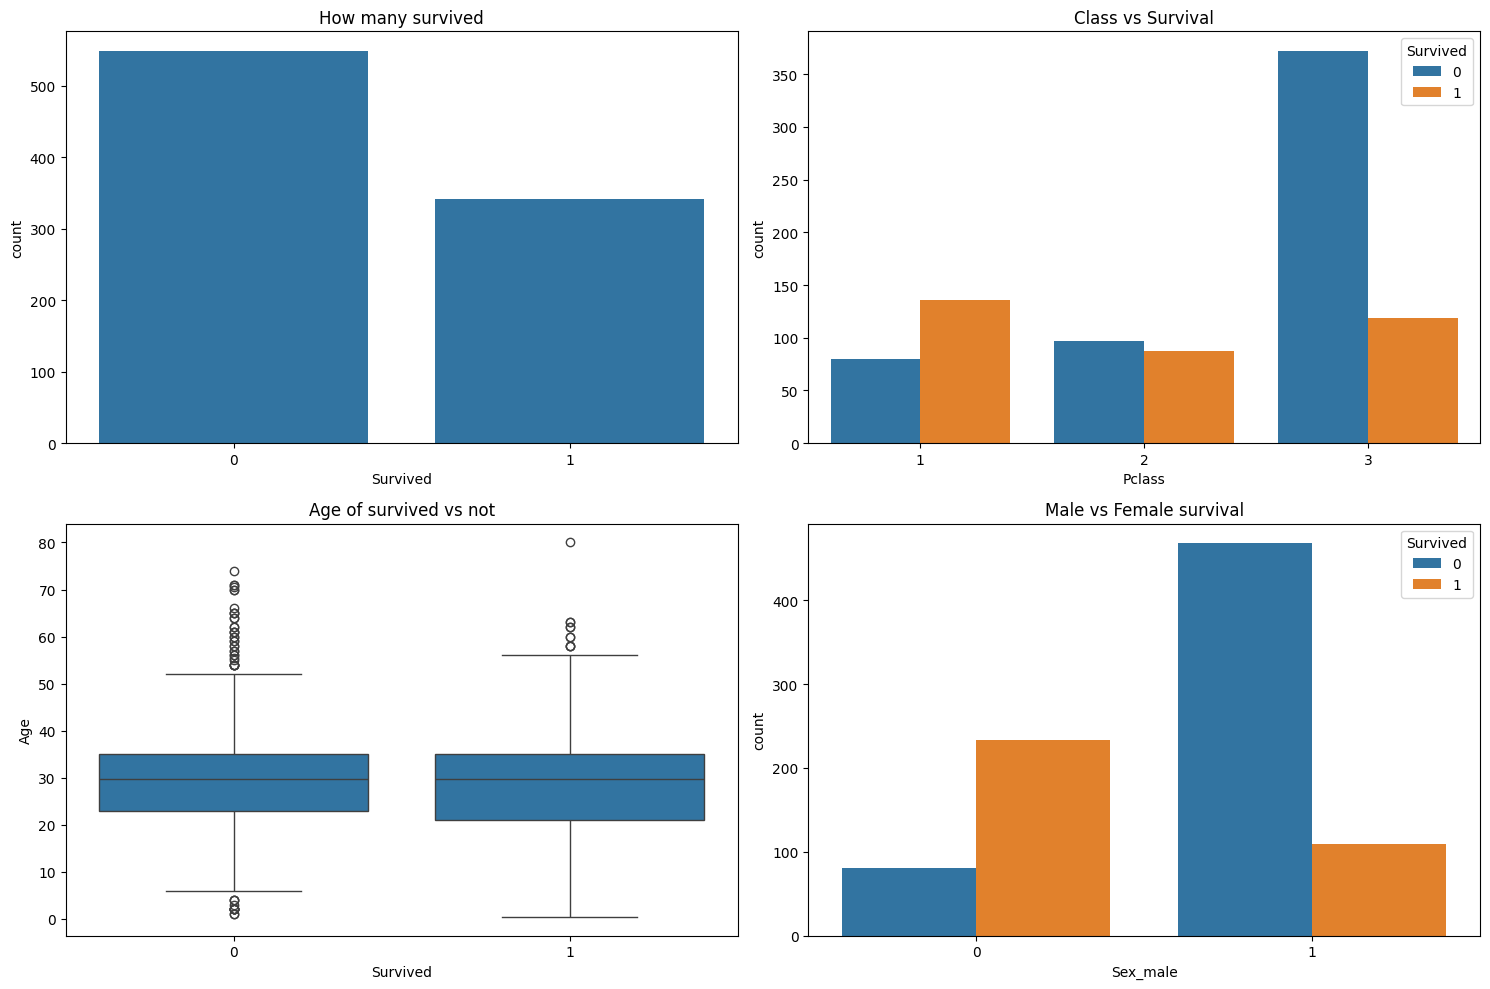

In [14]:
# Now some plots to understand data
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='Survived', data=df)
plt.title("How many survived")

plt.subplot(2,2,2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Class vs Survival")

plt.subplot(2,2,3)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age of survived vs not")

plt.subplot(2,2,4)
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.title("Male vs Female survival")

plt.tight_layout()
plt.savefig('titanic_plots.png')
plt.show()

In [15]:
# Prepare X and y
X = df.drop('Survived', axis=1)
y = df['Survived']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (891, 10)
y shape: (891,)


In [16]:
# Split data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")

Training data: (712, 10)
Test data: (179, 10)


In [18]:
# Train Logistic Regression (simple model)
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc*100:.2f}%")


Training Logistic Regression...
Logistic Regression Accuracy: 80.45%


In [19]:
# Train Random Forest (better model)
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc*100:.2f}%")


Training Random Forest...
Random Forest Accuracy: 82.12%


In [20]:
print("\nDetailed results:")
print(classification_report(y_test, rf_pred))


Detailed results:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [21]:
# See which features are important
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

In [22]:
print("\nTop 5 important features:")
print(feature_importance_df.head())


Top 5 important features:
      feature  importance
7    Sex_male    0.269984
4        Fare    0.256943
1         Age    0.244986
0      Pclass    0.085583
5  FamilySize    0.044950


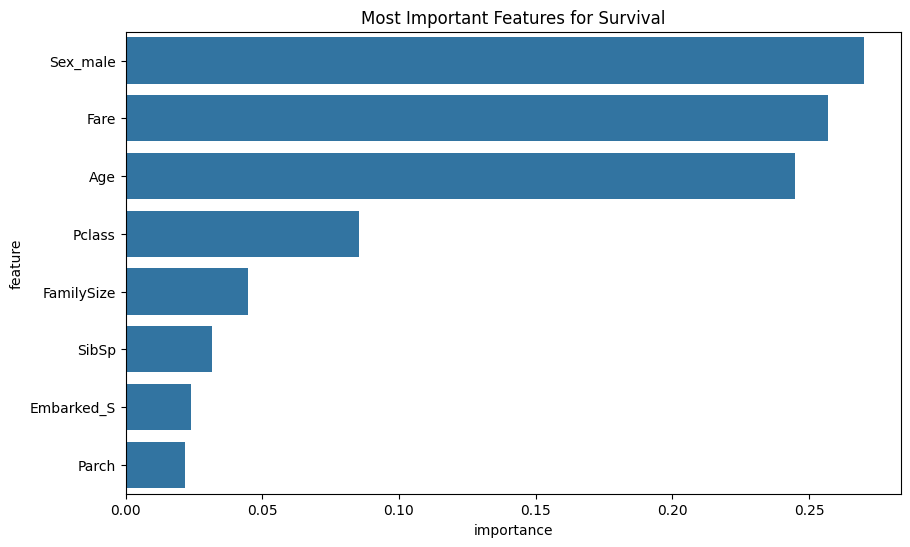

In [23]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(8), x='importance', y='feature')
plt.title("Most Important Features for Survival")
plt.savefig('feature_importance.png')
plt.show()

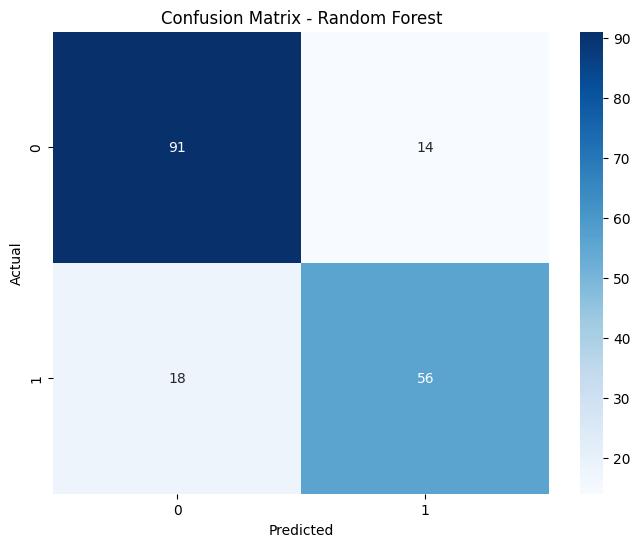

In [24]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')
plt.show()

In [25]:
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)
print(f"Best Model: Random Forest")
print(f"Accuracy: {rf_acc*100:.2f}%")
print("Files created: titanic_plots.png, feature_importance.png, confusion_matrix.png")
print("="*50)


RESULTS SUMMARY
Best Model: Random Forest
Accuracy: 82.12%
Files created: titanic_plots.png, feature_importance.png, confusion_matrix.png


In [26]:
# Function to predict for new person (for demo)
def predict_survival(age, pclass, sex_male, fare, family_size, is_alone, embarked_Q, embarked_S):
    new_data = pd.DataFrame({
        'Pclass': [pclass],
        'Age': [age],
        'SibSp': [0],  # assuming no siblings
        'Parch': [0],  # assuming no parents
        'Fare': [fare],
        'Sex_male': [sex_male],
        'FamilySize': [family_size],
        'IsAlone': [is_alone],
        'Embarked_Q': [embarked_Q],
        'Embarked_S': [embarked_S]
    })
    new_data = new_data[X.columns]
    prediction = rf_model.predict(new_data)[0]
    return "Survived" if prediction == 1 else "Did Not Survive"

In [27]:
# Test prediction
print("\nTesting prediction function:")
result = predict_survival(25, 3, 1, 7.25, 1, 1, 0, 0)
print(f"25 year old male, 3rd class, alone: {result}")


Testing prediction function:
25 year old male, 3rd class, alone: Did Not Survive
